<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/K_means_Clustering(Q_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv("Cust_Segmentation.csv")

In [ ]:
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
data_numeric = data.select_dtypes(include=[np.number])

In [ ]:
data_numeric = data_numeric.dropna()

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(data_numeric)


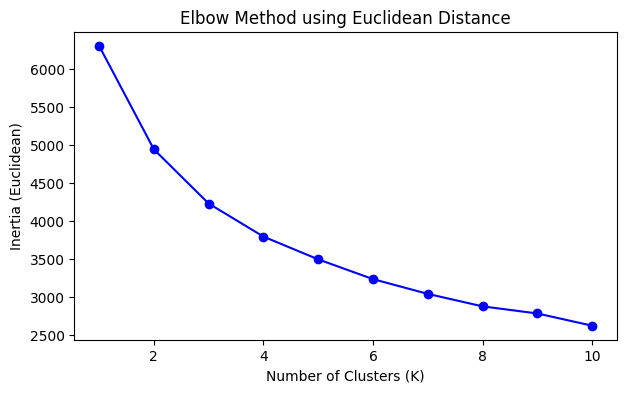

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Euclidean)')
plt.title('Elbow Method using Euclidean Distance')
plt.show()



In [ ]:
# --- Choose Optimal K (example: 4) ---
optimal_k = 4
# --- K-Means with Euclidean Distance ---
kmeans_euclidean = KMeans(n_clusters=optimal_k, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(X)
data_numeric['Cluster_Euclidean'] = labels_euclidean

In [ ]:
# --- K-Means with Manhattan Distance ---
# sklearn KMeans uses Euclidean by default, so we simulate Manhattan using transformed space
# Here we use precomputed cityblock (Manhattan) distances and apply clustering
dist_matrix = cdist(X, X, metric='cityblock')

In [ ]:
# Instead of direct clustering on distance matrix (since KMeans doesn't support it directly),
# we re-run KMeans but evaluate its performance based on Manhattan distances.
kmeans_manhattan = KMeans(n_clusters=optimal_k, random_state=42)
labels_manhattan = kmeans_manhattan.fit_predict(X)
data_numeric['Cluster_Manhattan'] = labels_manhattan

In [ ]:
# --- Evaluate Silhouette Scores ---
sil_euclidean = silhouette_score(X, labels_euclidean, metric='euclidean')
sil_manhattan = silhouette_score(X, labels_manhattan, metric='manhattan')
print(f"\nSilhouette Score (Euclidean): {sil_euclidean:.4f}")
print(f"Silhouette Score (Manhattan): {sil_manhattan:.4f}")



Silhouette Score (Euclidean): 0.1902
Silhouette Score (Manhattan): 0.2194


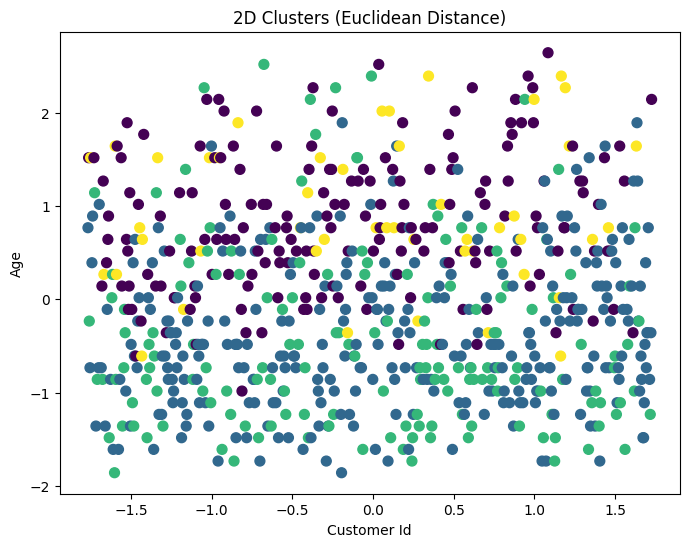

In [ ]:
# --- 2D Visualization (Euclidean) ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_euclidean, cmap='viridis', s=50)
plt.title('2D Clusters (Euclidean Distance)')
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.show()


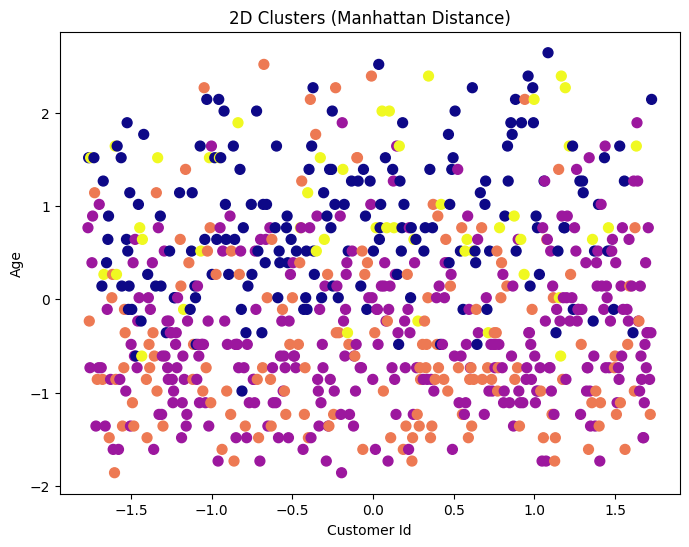

In [ ]:
# --- 2D Visualization (Manhattan) ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_manhattan, cmap='plasma', s=50)
plt.title('2D Clusters (Manhattan Distance)')
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.show()


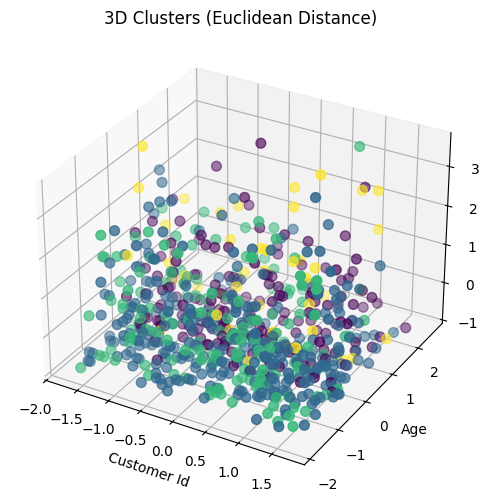

In [ ]:
# --- 3D Visualization (Euclidean) ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_euclidean, cmap='viridis', s=50)
ax.set_title('3D Clusters (Euclidean Distance)')
ax.set_xlabel(data_numeric.columns[0])
ax.set_ylabel(data_numeric.columns[1])
ax.set_zlabel(data_numeric.columns[2])
plt.show()

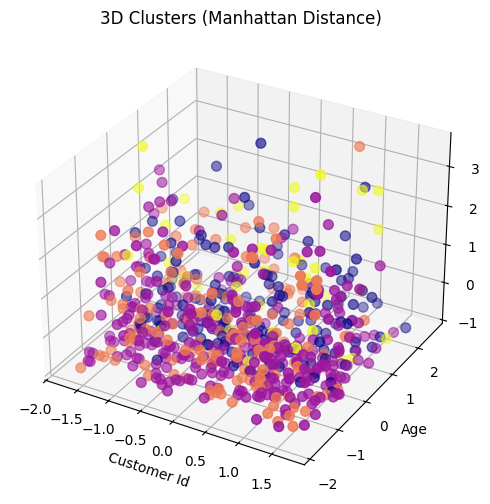

In [ ]:
# --- 3D Visualization (Manhattan) ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_manhattan, cmap='plasma', s=50)
ax.set_title('3D Clusters (Manhattan Distance)')
ax.set_xlabel(data_numeric.columns[0])
ax.set_ylabel(data_numeric.columns[1])
ax.set_zlabel(data_numeric.columns[2])
plt.show()

In [ ]:
import plotly.express as px

# --- Interactive 3D Plot (Euclidean Distance) ---
fig_euclidean = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    color=data_numeric['Cluster_Euclidean'].astype(str),
    title='Interactive 3D Clusters (Euclidean Distance)',
    labels={
        'x': data_numeric.columns[0],
        'y': data_numeric.columns[1],
        'z': data_numeric.columns[2]
    },
    hover_name=data_numeric.index.astype(str),
    hover_data={col: data_numeric[col] for col in data_numeric.columns}
)
fig_euclidean.update_traces(marker=dict(size=5, opacity=0.8))
fig_euclidean.update_layout(scene=dict(
    xaxis_title=data_numeric.columns[0],
    yaxis_title=data_numeric.columns[1],
    zaxis_title=data_numeric.columns[2]
))
fig_euclidean.show()


# --- Interactive 3D Plot (Manhattan Distance) ---
fig_manhattan = px.scatter_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    color=data_numeric['Cluster_Manhattan'].astype(str),
    title='Interactive 3D Clusters (Manhattan Distance)',
    labels={
        'x': data_numeric.columns[0],
        'y': data_numeric.columns[1],
        'z': data_numeric.columns[2]
    },
    hover_name=data_numeric.index.astype(str),
    hover_data={col: data_numeric[col] for col in data_numeric.columns}
)
fig_manhattan.update_traces(marker=dict(size=5, opacity=0.8))
fig_manhattan.update_layout(scene=dict(
    xaxis_title=data_numeric.columns[0],
    yaxis_title=data_numeric.columns[1],
    zaxis_title=data_numeric.columns[2]
))
fig_manhattan.show()